## <font style="background-color:DodgerBlue" color="White">Test On using smaller N to predict larger N</font>

In [29]:
include("setup.jl")

Model_run (generic function with 2 methods)

In [30]:
N = 4
w_r = zeros(5,N)
b_r = zeros(5,N)
times = Float64[]

for i in 1:5
    r = 10.0 ^ (-(i+1))
    if i == 1
        timed_result = @timed Model_run(N,r,rand(N),rand(N))
        w_r[i,:], b_r[i,:] = timed_result[1]
        push!(times, timed_result[2])
    else
        timed_result = @timed Model_run(N,r,w_r[i-1,:],b_r[i-1,:])
        w_r[i,:], b_r[i,:] = timed_result[1]
        push!(times, timed_result[2])
    end
    println("Time to train: ", timed_result[2])
end

 Reg = 0.010000000000000002  Resid = 1.906461100098511e-15  Loss = 0.0772405236486409 
Time to train: 1.3087901
 Reg = 0.001  Resid = 9.725153038318488e-6  Loss = 0.04790577979037828 
Time to train: 0.9587586
 Reg = 0.0001  Resid = 3.7934998904370237e-6  Loss = 0.021380122259188734 
Time to train: 4.7885999
 Reg = 1.0e-5  Resid = 9.792107363950938e-6  Loss = 0.01634406947759353 
Time to train: 18.5469009
 Reg = 1.0e-6  Resid = 9.721598128813403e-6  Loss = 0.015989062848876287 
Time to train: 35.1147293


In [32]:
param_node = param()
param_node.r = r = 10.0 ^ (-(6))
param_node.N = 4
theta_node = theta(w_r[5,:],b_r[5,:],1,1)

h = 2/param_node.Q
k = 1/param_node.N
x = (-1 .+ (1:param_node.Q) .* h .- h / 2)'

y_exact = x.^5 .+ 1/3 * x.^2

fhat, z, dzn, dzw, dzb = forward(param_node,x,theta_node)

([-0.45835574903070725, -0.4236072211778262, -0.3884570498689017, -0.3528832645269746, -0.31687373173757294, -0.2804324935421327, -0.24358890462593547, -0.2064106241950922, -0.1690217840589955, -0.13162783241963902  …  0.4649570196895854, 0.5124337916715169, 0.559806069769995, 0.6068907152753856, 0.6535308221914545, 0.6995955619087902, 0.7449799512998202, 0.7896041958262561, 0.8334124503293124, 0.8763709890260984], [-0.984375 -0.7343756669555115 … -0.23509399929488753 -0.45835574903070725; -0.953125 -0.7031260146460899 … -0.20395349720136574 -0.4236072211778262; … ; 0.953125 0.7031268893983798 … 0.7021578673241925 0.8334124503293124; 0.984375 0.7343762419556246 … 0.7333679412201718 0.8763709890260984], [0.9999910452537817 0.997427666395808 0.9996211493031615 1.1090921814934807; 0.9999863770644942 0.9962807026621031 0.9996121182071289 1.1228690248344337; … ; 0.9999746324284925 0.9994275221203919 0.9992305466274707 1.3902933640893065; 0.9999833251477042 0.9996041928162023 0.9992121944907

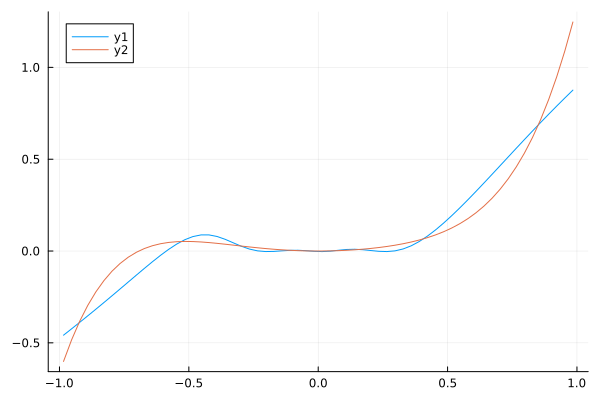

In [33]:
plot(x',fhat)
plot!(x',y_exact')

In [34]:
function CreateX(vec1, target_N)

    vec2 = zeros(target_N)

    for i in 1:length(vec1)
        # Set the current value
        vec2[2i - 1] = vec1[i]
        # Check if not at the end to interpolate
        if i < length(vec1)
            # Linear interpolation and set the next value
            vec2[2i] = (vec1[i] + vec1[i+1]) / 2
        end
    end

    vec2[end] = vec1[end]

    return vec2

end

CreateX (generic function with 1 method)

In [35]:
function CreateVec(vec1, x, target_x)

    vec2 = zeros(length(target_x))

    for i in 1:length(vec1)
        # Set the current value
        vec2[2i - 1] = vec1[i]
        # Check if not at the end to interpolate
        if i < length(vec1)
            # Linear interpolation and set the next value
            vec2[2i] = vec1[i] + ((target_x[2i] - x[i]) * (vec1[i+1] - vec1[i] ) / (x[i+1] - x[i]))
        end
    end

    vec2[end] = vec1[end]

    return vec2
end

CreateVec (generic function with 1 method)

In [36]:
using Plots


### N = 4 -> N = 7

In [37]:
N = 7
w_r_7 = zeros(5,N)
b_r_7 = zeros(5,N)
x1 = LinRange(0, 1, 4)
x_7 = CreateX(x1, 7)

times_7 = Float64[]

for i in 1:5
    r = 10.0 ^ (-(i+1))
    init_w = CreateVec(w_r[i,:], x1, x_7)
    init_b = CreateVec(b_r[i,:], x1, x_7)
    
    timed_result = @timed Model_run(N,r,init_w,init_b)
    w_r_7[i,:], b_r_7[i,:] = timed_result[1]

    push!(times_7, timed_result[2])
    println("Time to train: ", timed_result[2])
end

 Reg = 0.010000000000000002  Resid = 2.467635470959628e-13  Loss = 0.07754595080269491 
Time to train: 1.4964961
 Reg = 0.001  Resid = 3.809832874354137e-6  Loss = 0.05444067513766937 
Time to train: 1.4760631
 Reg = 0.0001  Resid = 8.375463301852612e-6  Loss = 0.026360099487574562 
Time to train: 9.058846
 Reg = 1.0e-5  Resid = 9.881812581909633e-6  Loss = 0.013151128520949556 
Time to train: 53.2744005
 Reg = 1.0e-6  Resid = 9.707056795934743e-6  Loss = 0.009557323903351397 
Time to train: 157.8615305


#### <font color="Green">Plot of w vs tau </font>

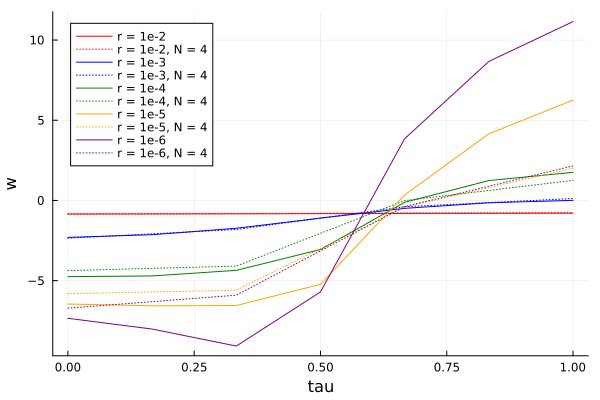

In [46]:
plt = plot() 
colors = [:red, :blue, :green, :orange, :purple]
for i in 1:5
    plot!(x_7,w_r_7[i,:],label="r = 1e-$(i+1)", color=colors[i])
    plot!(x1,w_r[i,:],label="r = 1e-$(i+1), N = 4", linestyle=:dot, color=colors[i])
end

xlabel!(plt, "tau")
ylabel!(plt, "w")

display(plt)

#savefig(plt, "figs/Ntest_N7_wplot.png")

In [39]:
param_node = param()
param_node.r = r = 10.0 ^ (-(6))
param_node.N = 7
theta_node = theta(w_r_7[5,:],b_r_7[5,:],1,1)

h = 2/param_node.Q
k = 1/param_node.N
x = (-1 .+ (1:param_node.Q) .* h .- h / 2)'

y_exact = x.^5 .+ 1/3 * x.^2

fhat, z, dzn, dzw, dzb = forward(param_node,x,theta_node)


([-0.563673117703836, -0.47811138006585463, -0.38813512314077975, -0.3049240292813206, -0.23528396011319086, -0.17927934498317183, -0.1338774832704291, -0.09612942837446586, -0.0641656961339794, -0.037102734061859904  …  0.34245323205717104, 0.41163848493300786, 0.4894804914194664, 0.5662547784763948, 0.633173588968148, 0.6878326935070913, 0.7326980515364125, 0.7713089301005117, 0.8063780351978544, 0.8395657660046377], [-0.984375 -0.8415194655843009 … -0.42081597542616833 -0.563673117703836; -0.953125 -0.8102704029724188 … -0.33525424111605384 -0.47811138006585463; … ; 0.953125 0.8102678790747178 … 0.6675025552756263 0.8063780351978544; 0.984375 0.8415178709992438 … 0.6987076674759107 0.8395657660046377], [0.9999763653510485 0.9999436129682415 … 1.8540810306980915 1.0000000129254332; 0.9999625913701717 0.9999069333259483 … 2.157660142155173 1.0000000871548766; … ; 0.999999677728583 0.9999988315573785 … 1.0000052730301143 1.0875749589965253; 0.9999997963913061 0.9999992920882975 … 1.000

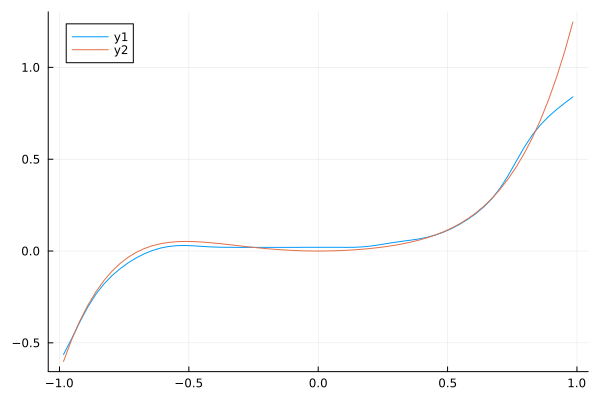

In [40]:
plot(x',fhat)
plot!(x',y_exact')

### N = 7 -> N = 13

In [41]:
N = 13
w_r_13 = zeros(5,N)
b_r_13 = zeros(5,N)
x_13 = CreateX(x_7, 13)

times_13 = Float64[]

for i in 1:5
    r = 10.0 ^ (-(i+1))
    init_w = CreateVec(w_r[i,:], x1, x_13)
    init_b = CreateVec(b_r[i,:], x1, x_13)
    
    timed_result = @timed Model_run(N,r,init_w,init_b)
    w_r_13[i,:], b_r_13[i,:] = timed_result[1]

    push!(times_13, timed_result[2])
    println("Time to train: ", timed_result[2])
end

 Reg = 0.010000000000000002  Resid = 2.581619722771128e-8  Loss = 0.07771332579669071 
Time to train: 2.6191283
 Reg = 0.001  Resid = 6.508827923848957e-6  Loss = 0.056909801592655476 
Time to train: 5.2451389
 Reg = 0.0001  Resid = 7.631481485151034e-6  Loss = 0.030313389814534315 
Time to train: 37.245748
 Reg = 1.0e-5  Resid = 9.843051353206837e-6  Loss = 0.017966844004071107 
Time to train: 235.1680454
 Reg = 1.0e-6  Resid = 9.881885505221485e-6  Loss = 0.008991390934326243 
Time to train: 280.1124242


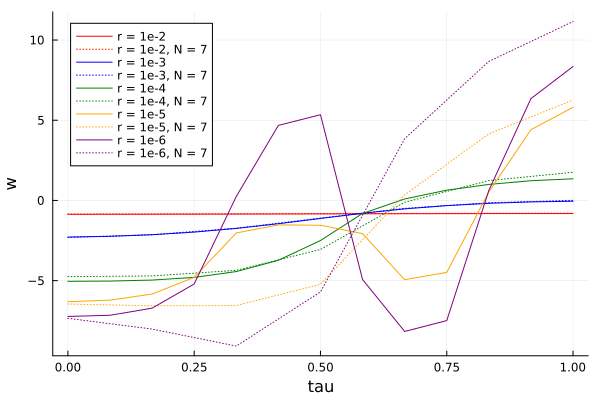

In [45]:
plt = plot() 
colors = [:red, :blue, :green, :orange, :purple]

for i in 1:5
    plot!(x_13,w_r_13[i,:],label="r = 1e-$(i+1)", color=colors[i])
    plot!(x_7,w_r_7[i,:],label="r = 1e-$(i+1), N = 7", linestyle=:dot, color=colors[i])
end

xlabel!(plt, "tau")
ylabel!(plt, "w")

display(plt)

#savefig(plt, "figs/Ntest_N7_wplot.png")

In [43]:
param_node = param()
param_node.r = r = 10.0 ^ (-(6))
param_node.N = 7
theta_node = theta(w_r_7[5,:],b_r_7[5,:],1,1)

h = 2/param_node.Q
k = 1/param_node.N
x = (-1 .+ (1:param_node.Q) .* h .- h / 2)'

y_exact = x.^5 .+ 1/3 * x.^2

fhat, z, dzn, dzw, dzb = forward(param_node,x,theta_node)

([-0.563673117703836, -0.47811138006585463, -0.38813512314077975, -0.3049240292813206, -0.23528396011319086, -0.17927934498317183, -0.1338774832704291, -0.09612942837446586, -0.0641656961339794, -0.037102734061859904  …  0.34245323205717104, 0.41163848493300786, 0.4894804914194664, 0.5662547784763948, 0.633173588968148, 0.6878326935070913, 0.7326980515364125, 0.7713089301005117, 0.8063780351978544, 0.8395657660046377], [-0.984375 -0.8415194655843009 … -0.42081597542616833 -0.563673117703836; -0.953125 -0.8102704029724188 … -0.33525424111605384 -0.47811138006585463; … ; 0.953125 0.8102678790747178 … 0.6675025552756263 0.8063780351978544; 0.984375 0.8415178709992438 … 0.6987076674759107 0.8395657660046377], [0.9999763653510485 0.9999436129682415 … 1.8540810306980915 1.0000000129254332; 0.9999625913701717 0.9999069333259483 … 2.157660142155173 1.0000000871548766; … ; 0.999999677728583 0.9999988315573785 … 1.0000052730301143 1.0875749589965253; 0.9999997963913061 0.9999992920882975 … 1.000

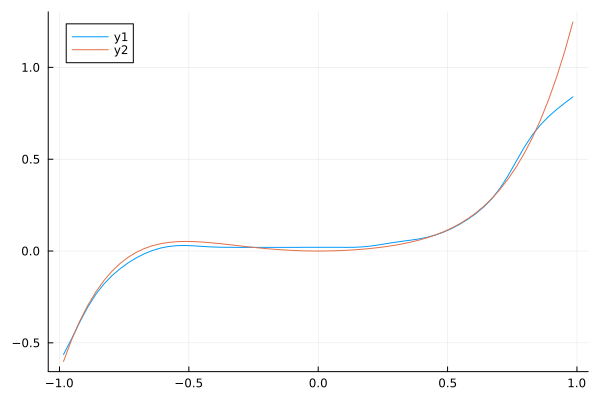

In [44]:
plot(x',fhat)
plot!(x',y_exact')

### N = 16 -> N =31

In [ ]:
N = 31
w_r_32 = zeros(5,N)
b_r_32 = zeros(5,N)
x1 = LinRange(0, 1, 16)
x2 = CreateX(x1, 31)

times_32 = Float64[]

for i in 1:5
    r = 10.0 ^ (-(i+2))
    init_w = CreateVec(w_r[i,:], x1, x2)
    init_b = CreateVec(b_r[i,:], x1, x2)
    
    timed_result = @timed Model_run(N,r,init_w,init_b)
    w_r_32[i,:], b_r_32[i,:] = timed_result[1]

    push!(times_32, timed_result[2])
    print("Time to train: ", timed_result[2])
end

#### <font color="Green">Plot of w vs tau </font>

In [ ]:
plt = plot() 
for i in 1:5
    plot!(x2,w_r_32[i,:],label="r = 1e-$(i+2)")
end

xlabel!(plt, "tau")
ylabel!(plt, "w")

display(plt)

savefig(plt, "figs/Ntest_N31_wplot.png")

#### <font color="Green">Plot of b vs tau </font>

In [ ]:
plt = plot() 
for i in 1:5
    plot!(x2,b_r_32[i,:],label="r = 1e-$(i+2)")
end

xlabel!(plt, "tau")
ylabel!(plt, "b")

display(plt)
savefig(plt, "figs/Ntest_N31_bplot.png")

### N = 31 -> N = 61

In [ ]:
N = 61
w_r_61 = zeros(5,N)
b_r_61 = zeros(5,N)
x_61 = CreateX(x2, 61)

times_61 = Float64[]

for i in 1:5
    r = 10.0 ^ (-(i+2))
    init_w = CreateVec(w_r[i,:], x2, x_61)
    init_b = CreateVec(b_r[i,:], x2, x_61)
    timed_result = @timed Model_run(N,r,init_w,init_b)
    w_r_61[i,:], b_r_61[i,:] = timed_result[1]
    push!(times_61, timed_result[2])

    print("Time to train: ", timed_result[2])
end


In [ ]:
plt = plot() 
for i in 1:5
    plot!(x_61,w_r_61[i,:],label="r = 1e-$(i+2)")
end

xlabel!(plt, "tau")
ylabel!(plt, "w")

display(plt)

savefig(plt, "figs/Ntest_N61_wplot.png")

In [ ]:
plt = plot() 
for i in 1:5
    plot!(x_61,b_r_61[i,:],label="r = 1e-$(i+2)")
end

xlabel!(plt, "tau")
ylabel!(plt, "b")

display(plt)

savefig(plt, "figs/Ntest_N61_bplot.png")